In [2]:
import pandas as pd

df = pd.read_csv("/Users/macbook/Documents/GitHub/DSfinProject/dsfinlendclub/data/01_raw/Loan_status_2007-2020Q3.csv", low_memory=False)
print(df.shape)  # Check dataset dimensions
print(df.info())  # Check data types and missing values


,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,595422,15492,134798709,24000.0,24000.0,24000.0,60 months,11.05%,522.42,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,562657,90591,127097355,14000.0,14000.0,14000.0,60 months,13.59%,322.79,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


(2925493, 142)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(1), object(35)
memory usage: 3.1+ GB
None


### Exploration

In [17]:
# Drop columns with too many missing values
missing_threshold = 0.6  # Set 60% as a threshold
df = df[df.columns[df.isnull().mean() < missing_threshold]]

# Fill numeric columns with median
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with "Unknown"
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")


✅ Columns to keep (less than 60% missing):
['Unnamed: 0.1', 'Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_

In [18]:
df['issue_d'].head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,...,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,N,N
1,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,...,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,N,N
2,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,...,100.0,33.3,0.0,1.0,171118.0,13124.0,10000.0,7526.0,N,N
3,134798709,24000.0,24000.0,24000.0,60 months,11.05%,522.42,B,B4,NaN,...,95.7,0.0,0.0,0.0,202606.0,18520.0,49000.0,20000.0,N,N
4,127097355,14000.0,14000.0,14000.0,60 months,13.59%,322.79,C,C2,Shipping Clerk,...,100.0,0.0,0.0,0.0,152081.0,34847.0,28800.0,38181.0,N,N


In [19]:
# Convert date columns
format='%Y-%m-%d'

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%Y-%m-%d', errors='coerce')
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%Y-%m-%d', errors='coerce')


# Add new features
df = df.assign(
    credit_history_length=(df['issue_d'] - df['earliest_cr_line']).dt.days / 365,
    income_to_loan_ratio=df['annual_inc'] / df['loan_amnt'],
    loan_utilization=df['revol_bal'] / df['total_rev_hi_lim'],
    is_recent_delinquent=(df['mths_since_last_delinq'] < 12).astype(int)
).copy()


[]


In [9]:
from sklearn.preprocessing import LabelEncoder

# Ordinal encoding for loan grades
grade_order = ["A", "B", "C", "D", "E", "F", "G"]
df['grade'] = df['grade'].apply(lambda x: grade_order.index(x) if x in grade_order else -1)

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['home_ownership', 'purpose', 'addr_state'], drop_first=True)


### Exploratory Data Analysis (EDA)

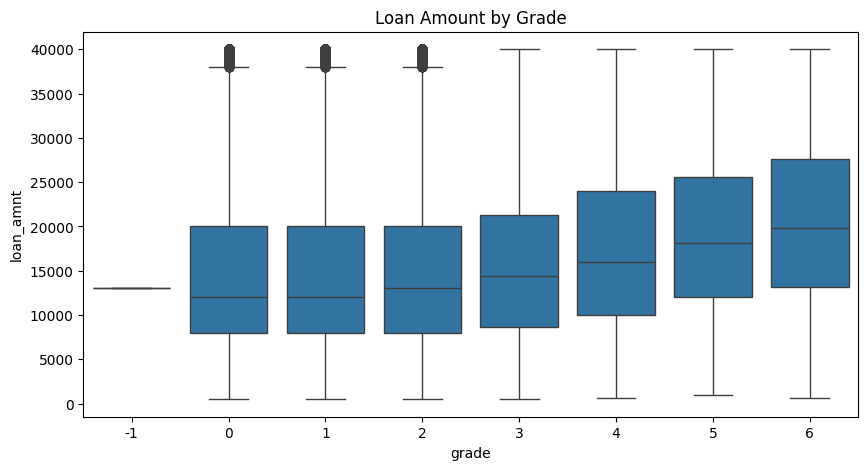

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["grade"], y=df["loan_amnt"])
plt.title("Loan Amount by Grade")
plt.show()

In [11]:
df[df['income_to_loan_ratio'] > 20].head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_Unknown,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,1,B5,...,False,False,False,False,False,False,False,False,False,False
15,15,1069759,1000.0,1000.0,1000.0,36 months,16.29%,35.31,3,D1,...,False,False,False,False,False,False,False,False,False,False
17,17,1069971,3600.0,3600.0,3600.0,36 months,6.03%,109.57,0,A1,...,False,False,False,False,False,False,False,False,False,False
28,28,1069799,4000.0,4000.0,4000.0,36 months,11.71%,132.31,1,B3,...,False,False,False,False,False,False,False,False,False,False
42,42,1069314,3000.0,3000.0,3000.0,36 months,18.25%,108.84,3,D5,...,False,False,False,False,False,False,False,False,False,False


### Model Development
 Define Target Variables
Fraud Detection → fraud_flag (Derived from anomalies)
Loan Default Prediction → loan_status
Convert loan_status to binary: Charged Off, Default, and Late are 1, others are 0.

In [12]:
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default', 'Late'] else 0)

In [17]:

df['loan_utilization'] = df['loan_utilization'].fillna(df['loan_utilization'].median())
df['credit_history_length'] = df['credit_history_length'].fillna(df['credit_history_length'].median())

In [18]:
from sklearn.model_selection import train_test_split

X = df[['income_to_loan_ratio', 'loan_utilization', 'credit_history_length', 'grade']]
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X.isnull().sum()

income_to_loan_ratio     0
loan_utilization         0
credit_history_length    0
grade                    0
dtype: int64

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93    512422
           1       0.32      0.04      0.08     72677

    accuracy                           0.87    585099
   macro avg       0.60      0.52      0.50    585099
weighted avg       0.81      0.87      0.82    585099

AUC Score: 0.5150468568467126


In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### Evaluation

In [ ]:
import numpy as np

df['model_pred'] = model.predict(X)
df[['grade', 'loan_status', 'model_pred']].groupby('grade').mean()